In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score

In [10]:
## load dataset
df=pd.read_csv(r'/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
## statistic of dataset
diabetes=df[df['Outcome']==1].shape
non_diabetes=df[df['Outcome']==0].shape
print("Has Diabeties {}, Does not have Diabetes {}".format(diabetes,non_diabetes))
df.describe()

Has Diabeties (268, 9), Does not have Diabetes (500, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


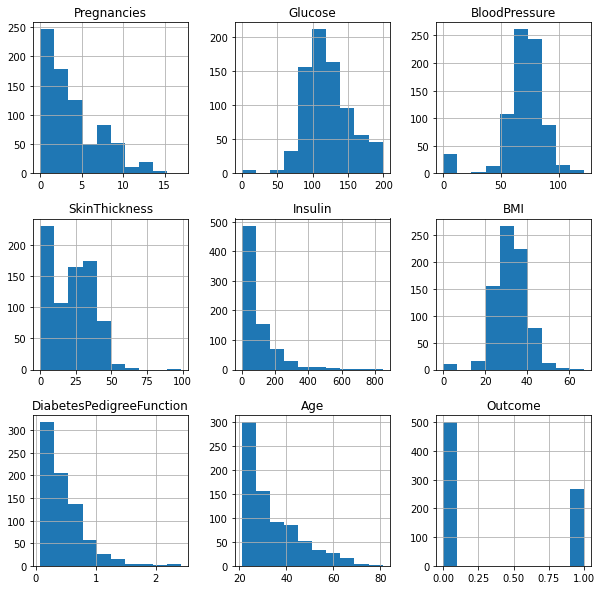

In [12]:
# x-axis range , y-axis abundance
histo = df.hist(figsize = (10,10))


In [13]:
## count of zero entries 
bp_zeros=df[df['BloodPressure']==0].shape
bmi_zeros=df[df['BMI']==0].shape
insulin_zeros=df[df['Insulin']==0].shape
glucose_zeros=df[df['Glucose']==0].shape
skin_zeros=df[df['SkinThickness']==0].shape
print('Zero Counts of BP :{},BMI : {} , Insulin : {} , Glucose : {} , skin : {} '
      .format(bp_zeros,bmi_zeros,insulin_zeros,glucose_zeros,skin_zeros))

Zero Counts of BP :(35, 9),BMI : (11, 9) , Insulin : (374, 9) , Glucose : (5, 9) , skin : (227, 9) 


In [14]:
#### pre-process Insulin & SkinThickness 

df_copy=df.copy(deep=True)
## replace 0 with NaN to fill out easily

df_copy[['Insulin','SkinThickness']]=df_copy[['Insulin','SkinThickness']].replace(0,np.NaN)
## The median is the middle point of a number set, in which half the numbers are above the median and half are below
## replace null value with median
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
## test result
# print(df_copy[df_copy['Insulin']==0].shape,df_copy[df_copy['SkinThickness']==0].shape)


In [15]:
# pre-process Blood Pressure , BMI & Glucose invalid values 
# as blood pressure & glucose are critical for determing diabeties it should not be invalid 
# their null fraction is very small so it should better to remove invalid entries
df_copy=df_copy[(df_copy['BloodPressure']!=0) & (df_copy['BMI']!=0) & (df_copy['Glucose']!=0)]
# test result
# print(df_copy[df_copy['BloodPressure']==0].shape,df_copy[df_copy['BMI']==0].shape,df_copy[df_copy['Glucose']==0].shape)


In [16]:
## split dataset on outcome from 70% to 30%
X=df_copy.drop('Outcome',axis=1)
y=df_copy['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 8)
(218, 8)
(506,)
(218,)


In [48]:

naive=GaussianNB()
naive.fit(X_train,y_train)
predicted_naive=naive.predict(X_test)
cm_naive=metrics.confusion_matrix(y_test,predicted_naive)
accuracy_naive=metrics.accuracy_score(y_test,predicted_naive)

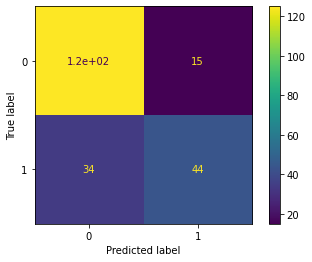

In [29]:
plot_confusion_matrix(naive, X_test, y_test)  
plt.show() 

In [49]:
print("Confusion Matrix : \n {}  \n Accuracy : \n {} ".format(cm_naive,accuracy_naive))
# Accuracy : 0.7752293577981652
average_precision = average_precision_score(y_test, predicted_naive)
print(average_precision)

Confusion Matrix : 
 [[125  15]
 [ 34  44]]  
 Accuracy : 
 0.7752293577981652 
0.5766499607270872


In [50]:
#  KNN Implementation 
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
predicted_knn=knn.predict(X_test)
cm_knn=metrics.confusion_matrix(y_test,predicted_knn)
accuracy_knn=metrics.accuracy_score(y_test,predicted_knn)


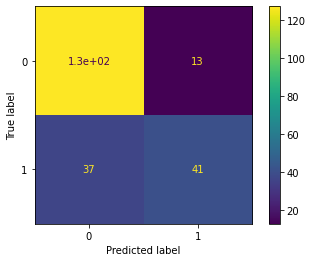

In [34]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show() 

In [51]:
print("Confusion Matrix : \n {}  \n Accuracy :  {} ".format(cm_knn,accuracy_knn))

Confusion Matrix : 
 [[127  13]
 [ 37  41]]  
 Accuracy :  0.7706422018348624 


In [43]:
# k=3 (accuracy  0.7385321100917431) k=5 ( Accuracy :0.7522935779816514 ) 
# k=11 (Accuracy :  0.7706422018348624) k=13 ( Accuracy :  0.7614678899082569 )
average_precision = average_precision_score(y_test, predicted_knn)
print(average_precision)

0.5688225864066843


In [52]:
# decision tree
d_tree=tree.DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
predicted_tree=d_tree.predict(X_test)
accuracy_tree=metrics.accuracy_score(y_test,predicted_tree)
cm_dt=metrics.confusion_matrix(y_test,predicted_tree)

In [53]:
print("Confusion Matrix : \n {}  \n Accuracy :  {} ".format(cm_dt,accuracy_tree))
# 0.6972477064220184

Confusion Matrix : 
 [[110  30]
 [ 41  37]]  
 Accuracy :  0.6743119266055045 


In [42]:
average_precision = average_precision_score(y_test, predicted_tree)
print(average_precision)

0.45747051114023596


In [56]:
# Logistic regression
logisticRegr= LogisticRegression()
logisticRegr.fit(X_train,y_train)
predict_lg = logisticRegr.predict(X_test)
accuarcy_lg=metrics.accuracy_score(y_test,predict_lg)
cm_lg=metrics.confusion_matrix(y_test,predict_lg)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
print("Confusion Matrix : \n {}  \n Accuracy :  {} ".format(cm_lg,accuarcy_lg))
#0.7752293577981652
average_precision = average_precision_score(y_test, predict_lg)
print(average_precision)

Confusion Matrix : 
 [[130  10]
 [ 38  40]]  
 Accuracy :  0.7798165137614679 
0.5845683368619149


In [59]:
# LDA
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predict_lda=lda.predict(X_test)
accuracy_lda=metrics.accuracy_score(y_test,predict_lda)
cm_lda=metrics.confusion_matrix(y_test,predict_lda)

In [60]:
print("Confusion Matrix : \n {}  \n Accuracy :  {} ".format(cm_lda,accuracy_lda))
# 0.7798165137614679

Confusion Matrix : 
 [[131   9]
 [ 39  39]]  
 Accuracy :  0.7798165137614679 


In [39]:

average_precision = average_precision_score(y_test, predict_lda)
print(average_precision)

0.5851490825688074
